In [1]:
# import packages
import os
import tarfile
import urllib
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

TEAM_PATH = './resources/teams/michiganStateTeam.csv'

In [2]:
def load_data(path=TEAM_PATH):
    return pd.read_csv(path,header=0)

In [3]:
def scatter_plot(df, label_column):
    sns.set(style="ticks")
    num_cols = df.select_dtypes(include=np.number).columns
    num_cols = [col for col in num_cols if col != label_column]
    
    ncols = 3
    nrows = np.ceil(len(num_cols) / ncols).astype(int)
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, nrows * 7))
    ax = ax.flatten()
    
    for i, col in enumerate(num_cols):
        sns.scatterplot(x=df[col], y=df[label_column], ax=ax[i])
        ax[i].set_xlabel(col)
        ax[i].set_ylabel(label_column)
        
    plt.tight_layout()
    plt.show()

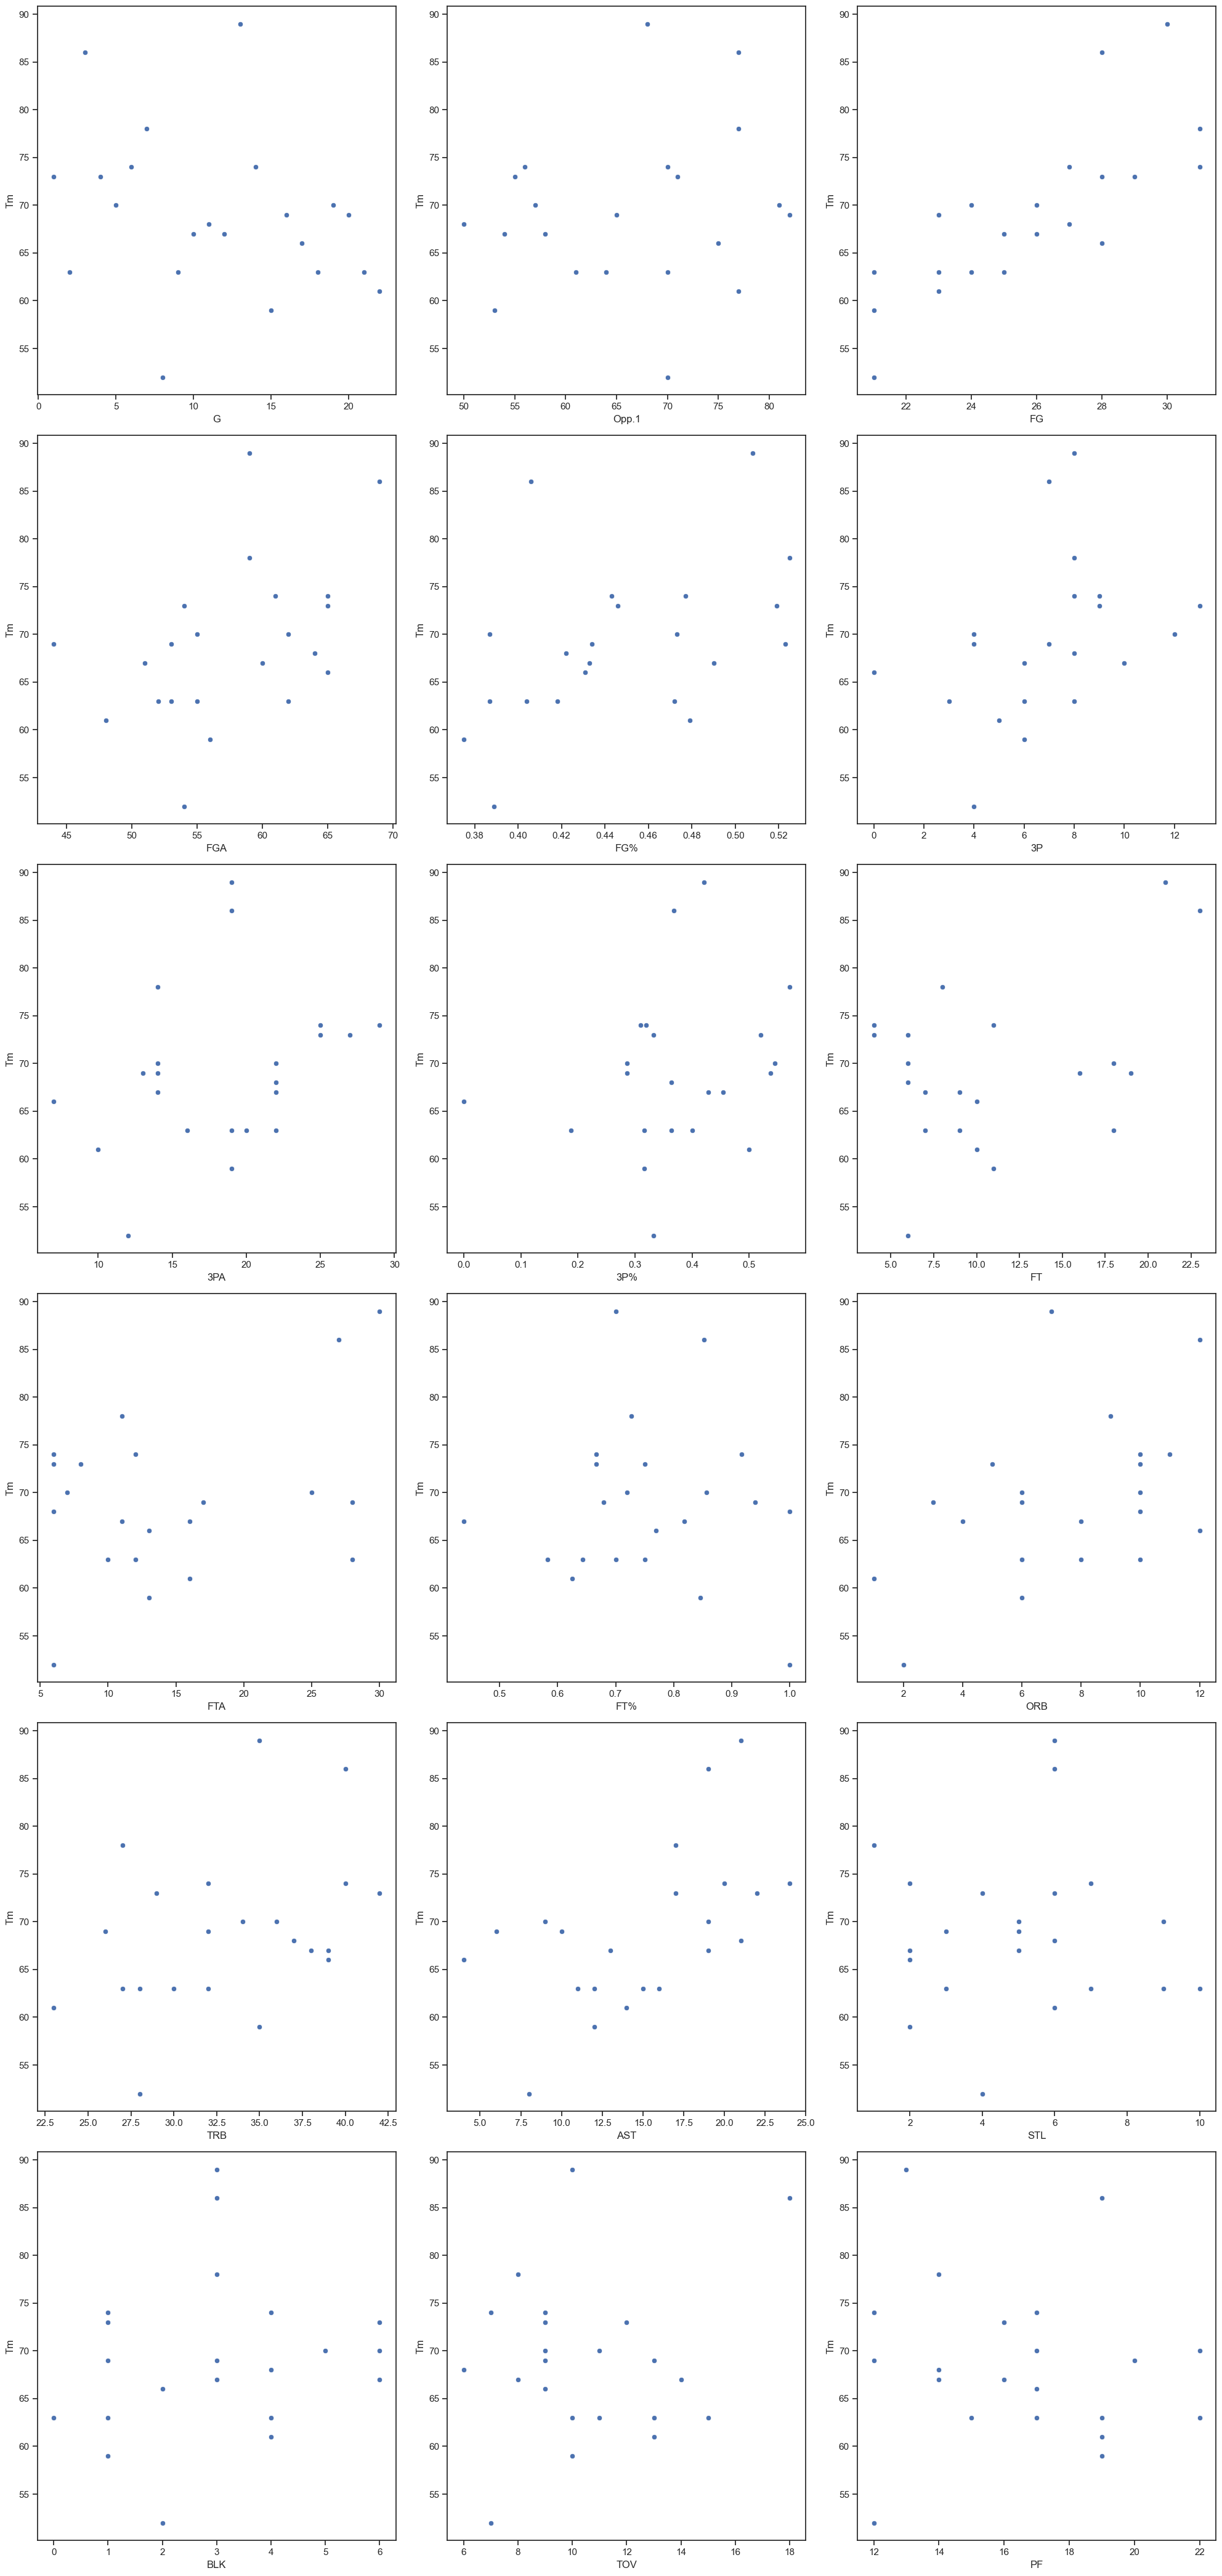

In [4]:
teamData = load_data()
teamData.head()
labels = teamData["Tm"].copy().values

scatter_plot(teamData, "Tm")

In [5]:
teamData.corr()

C:\Users\rykun\AppData\Local\Temp\ipykernel_14560\77593277.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  teamData.corr()


,G,Tm,Opp.1,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,ORB,TRB,AST,STL,BLK,TOV,PF
G,1.000000,-0.296797,-0.056398,-0.212504,-0.340306,0.123797,-0.142857,-0.333017,0.082928,-0.126255,-0.067998,-0.165028,-0.230077,-0.228170,-0.242053,0.096523,-0.006160,-0.159275,0.009664
Tm,-0.296797,1.000000,0.182872,0.773523,0.442965,0.445742,0.364487,0.309833,0.220767,0.422525,0.370664,-0.057047,0.471600,0.370314,0.544594,-0.002271,0.150011,0.152874,-0.134211
Opp.1,-0.056398,0.182872,1.000000,-0.034296,-0.057527,0.030379,-0.396149,-0.493953,-0.117225,0.506792,0.487459,-0.071464,-0.056225,-0.487992,-0.404853,-0.209797,-0.300456,0.222785,0.247212
FG,-0.212504,0.773523,-0.034296,1.000000,0.603353,0.519190,0.383441,0.348057,0.136431,-0.163979,-0.187420,-0.066509,0.581046,0.470662,0.602935,-0.133062,0.223890,-0.228213,-0.306578
FGA,-0.340306,0.442965,-0.057527,0.603353,1.000000,-0.363532,-0.024241,0.274188,-0.385279,-0.002273,-0.080174,0.155551,0.816966,0.655606,0.277385,0.057352,0.184173,-0.245908,-0.006120
FG%,0.123797,0.445742,0.030379,0.519190,-0.363532,1.000000,0.479831,0.102381,0.588450,-0.165053,-0.122415,-0.226097,-0.181579,-0.123856,0.400930,-0.220302,0.084745,0.035551,-0.359712
3P,-0.142857,0.364487,-0.396149,0.383441,-0.024241,0.479831,1.000000,0.773268,0.720426,-0.401974,-0.395125,-0.075472,0.012085,0.108295,0.824315,0.199482,0.352784,-0.008277,-0.359034
3PA,-0.333017,0.309833,-0.493953,0.348057,0.274188,0.102381,0.773268,1.000000,0.199975,-0.326436,-0.322615,-0.039901,0.346869,0.302294,0.779497,0.263088,0.185338,-0.074251,-0.175056
3P%,0.082928,0.220767,-0.117225,0.136431,-0.385279,0.588450,0.720426,0.199975,1.000000,-0.197711,-0.205800,-0.029558,-0.431384,-0.245046,0.500405,0.040507,0.335266,0.075702,-0.376842
FT,-0.126255,0.422525,0.506792,-0.163979,-0.002273,-0.165053,-0.401974,-0.326436,-0.197711,1.000000,0.946655,0.028410,0.045093,-0.031046,-0.289570,0.039637,-0.207438,0.475865,0.323942


In [6]:
features = teamData.drop("Tm",axis=1)
features.drop(columns=['Opp','W/L','G','Date','Court'],inplace=True)
for colName, colData in features.iteritems():
    if '%' in colName:
        features.drop(colName, axis=1, inplace=True)
labels = teamData["Tm"].copy()

C:\Users\rykun\AppData\Local\Temp\ipykernel_14560\3610667240.py:3: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for colName, colData in features.iteritems():


In [7]:
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy = "median")),
    ('std_scaler', StandardScaler())
])
featuresScaled = num_pipeline.fit_transform(features)

train_features, test_features, train_labels, test_labels = train_test_split(
    featuresScaled, labels, test_size=0.2, random_state=42
)

In [8]:
# Fit the RandomForestRegressor
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(train_features, train_labels)

# Make predictions on the test set
predictions = rf_reg.predict(test_features)

In [9]:

print("Predictions:", predictions)
print("Labels:", list(test_labels))

mse = mean_squared_error(test_labels, predictions)
rmse = np.sqrt(mse)
print("MSE:", rmse)


Predictions: [72.22 74.53 66.39 63.91 65.1 ]
Labels: [73, 74, 63, 63, 69]
MSE: 2.3840931189867582


In [10]:
"""
Opp,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,ORB,TRB,AST,STL,BLK,TOV,PF

70,23,55,8,22,9,12,6,27,16,7,4,13,17
"""
line = [[70,23,55,8,22,9,12,6,27,16,7,4,13,17]]
print(rf_reg.predict(line))


[84.58]
